In [2]:
%pylab inline --no-import-all
import ROOT

Populating the interactive namespace from numpy and matplotlib


In [3]:
import rootnotes
c1 = rootnotes.default_canvas()

In [4]:
%ls csv

ConvertToRoot.C                        parameterized_inc05_indexed.root?dl=0
fixed.csv                              parameterized_inc10.csv
parameterized.root                     parameterized_inc10.root
parameterized_inc05.csv.gz             parameterized_inc10_indexed.root
parameterized_inc05.root


In [5]:
f= ROOT.TFile('csv/parameterized.root')
tree = f.Get('parameterized')

In [6]:
tree.Print()

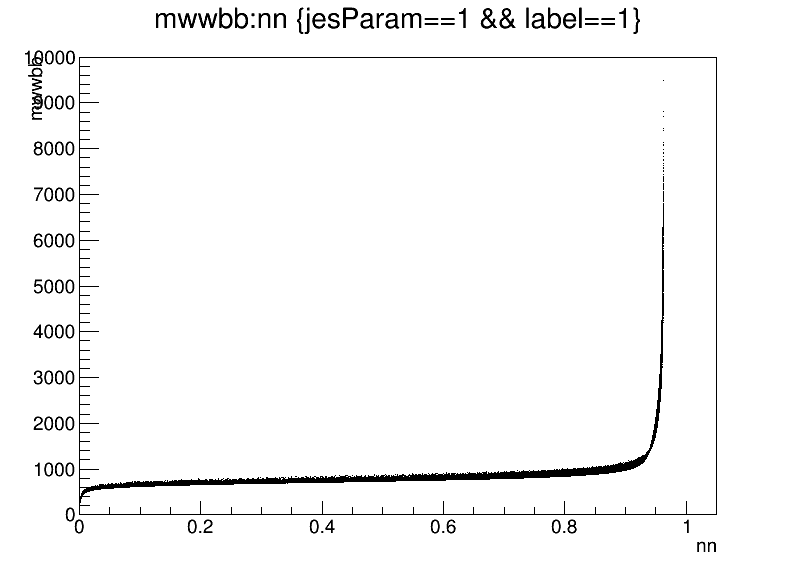

In [40]:
tree.Draw('mwwbb:nn','jesParam==1 && label==1')
c1

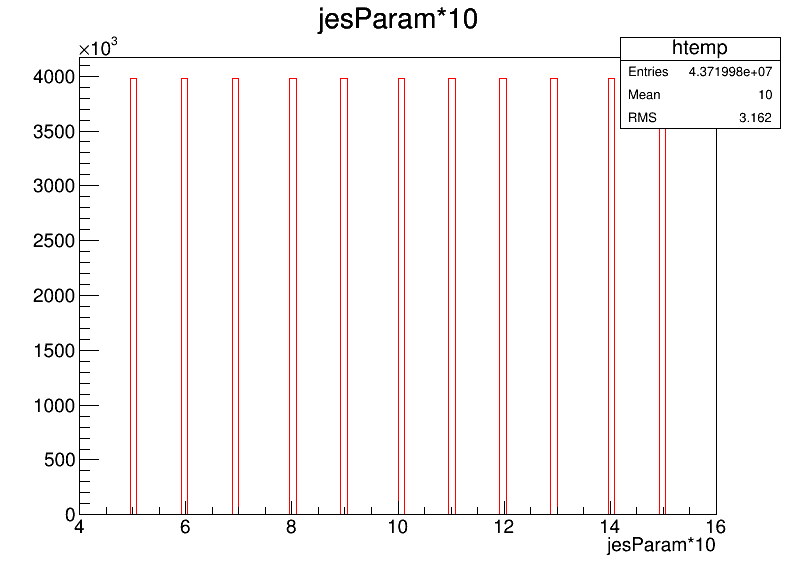

In [13]:
tree.Draw('jesParam*10','','')
c1

In [41]:
jesParamValues = np.linspace(5,15,11)/10
jesParamValues

array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5])

In [42]:
jesTrueValues = [0.75, 0.9, 0.95, 0.975, 1, 1.025, 1.05, 1.1, 1.25]
jesParamValues = jesTrueValues
tree.SetLineColor(0)
tree.Draw('jesTrue*10','label==0 ')
tree.SetLineColor(2)
for i in jesTrueValues:
    print 'label==0 && jesTrue==%s' %(i)
    print i, tree.Draw('jesTrue*10','label==0 && fabs(jesTrue-%s)<0.001' %(i),'same')
c1

label==0 && jesTrue==0.75
0.75 1231848
label==0 && jesTrue==0.9
0.9 1231848
label==0 && jesTrue==0.95
0.95 1231848
label==0 && jesTrue==0.975
0.975 1231848
label==0 && jesTrue==1
1 1231848
label==0 && jesTrue==1.025
1.025 1231848
label==0 && jesTrue==1.05
1.05 1231848
label==0 && jesTrue==1.1
1.1

KeyboardInterrupt: 

In [43]:
histograms = []
for jesTrue in jesTrueValues:
    for jesParam in jesParamValues:
        for label in [0,1]:
            title = 'h_%.3f_%.3f_%d' %(jesTrue, jesParam,label)
            print title
            h = ROOT.TH1F(title, 'test',100,0,1)
            histograms.append(h)
            cut = 'fabs(jesTrue-%f)<0.001 && fabs(jesParam-%f)<0.001 && label == %d' \
            %(jesTrue, jesParam,label)
            print cut
            tree.Draw('nn >> '+title, cut)   



 h_0.750_0.750_0
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.750000)<0.001 && label == 0
h_0.750_0.750_1
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.750000)<0.001 && label == 1
h_0.750_0.900_0
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.900000)<0.001 && label == 0
h_0.750_0.900_1
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.900000)<0.001 && label == 1
h_0.750_0.950_0
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.950000)<0.001 && label == 0
h_0.750_0.950_1
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.950000)<0.001 && label == 1
h_0.750_0.975_0
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.975000)<0.001 && label == 0
h_0.750_0.975_1
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-0.975000)<0.001 && label == 1
h_0.750_1.000_0
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-1.000000)<0.001 && label == 0
h_0.750_1.000_1
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-1.000000)<0.001 && label == 1
h_0.750_1.025_0
fabs(jesTrue-0.750000)<0.001 && fabs(jesParam-1.025000)<0.001 &

In [44]:
for h in histograms:
    print h.GetEntries()

136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
304744.0
136872.0
3

In [45]:
newf = ROOT.TFile("histograms_parameterized.root","RECREATE")
for h in histograms:
    h.GetEntries()
    h.Write()
newf.Close()

In [30]:
len(histograms)

198

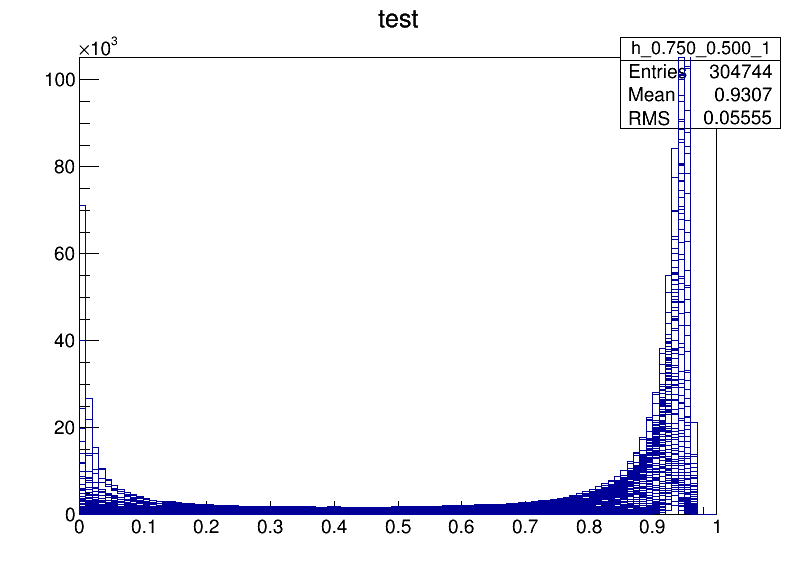

In [34]:
opt = ''
for i in range(99):
    histograms[2*i+1].Draw(opt)
    opt = 'same'
c1

TFile::Append:0: RuntimeWarning: Replacing existing TH1: sigHist (Potential memory leak).


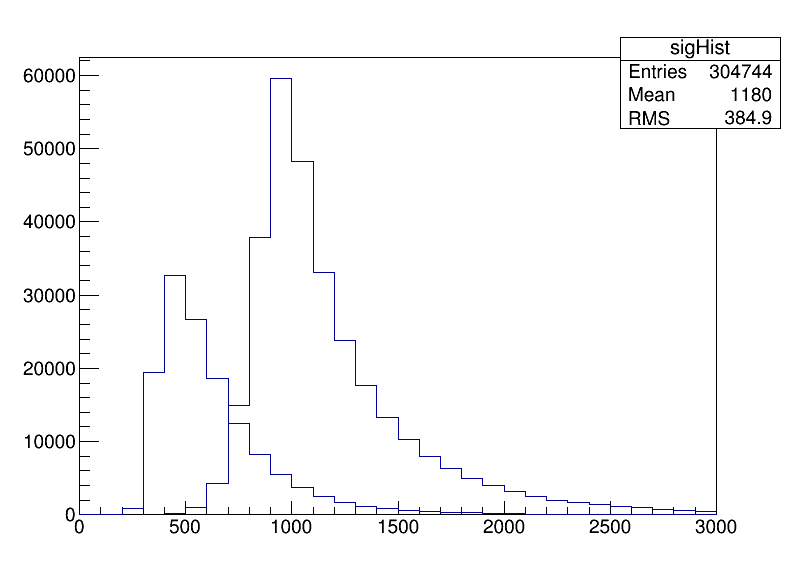

In [26]:
sigHist = ROOT.TH1F('sigHist','',30,0,3000)
bkgHist = sigHist.Clone('bkgHist')
tree.Draw("mwwbb >> sigHist","ijesParam==3 && ijesTrue==3 && label==1")
tree.Draw("mwwbb >> bkgHist","ijesParam==3 && ijesTrue==3 && label==0")
sigHist.Draw()
bkgHist.Draw('same')
c1

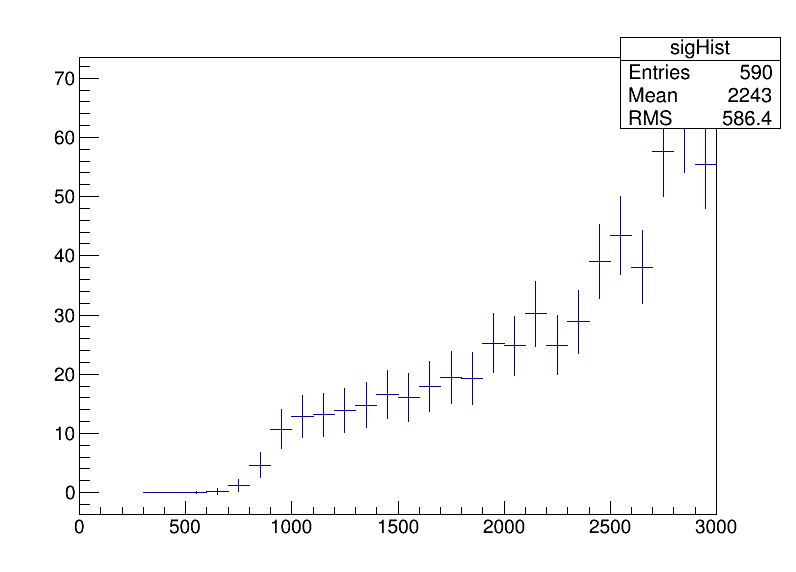

In [27]:
sigHist.Divide(bkgHist)
sigHist.Draw('e')
c1